In [1]:
# %matplotlib inline
# 1.5.3 pandas
import datetime
import numpy as np
import pandas as pd


from midas.mix import mix_freq, mix_freq2
from midas.adl import estimate, forecast, midas_adl, rmse, estimate2,forecast2, midas_adl2
print(pd.__version__)

2.2.3


In [2]:
merge = pd.read_csv('./testData/2024/merged.csv',parse_dates=['date'],index_col='date')
sell = pd.read_csv('./testData/2024/df_vacum_grouped_weekly2024.csv',parse_dates=['date'],index_col='date')

In [3]:
df = merge[['Total_Amount_Normalized','sq_new_sum','weekly_holiday_score_norm']]
df.columns = ['sell','google_search','holiday_trend']
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].apply(lambda x: 100 * (x - x.min()) / (x.max() - x.min()))


C:\Users\natou\AppData\Local\Temp\ipykernel_30588\1147964539.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols] = df[numeric_cols].apply(lambda x: 100 * (x - x.min()) / (x.max() - x.min()))


In [4]:
import io
import pandas as pd

# Shopee score table
shoppee_score = """date,score
2024-02-02,55
2024-03-03,60
2024-04-04,58
2024-05-05,65
2024-06-06,70
2024-07-07,75
2024-08-08,80
2024-09-09,88
2024-10-10,83
2024-11-11,100
2024-12-12,95"""

# Load Shopee event data
shopee_df = pd.read_csv(io.StringIO(shoppee_score), parse_dates=['date'])

# Ensure your df index is named and sorted
df.index.name = 'date'
df = df.sort_index()
shopee_df = shopee_df.sort_values('date')
# Assign event score to the most recent past week (align event to previous Sunday)
shopee_df['date'] = shopee_df['date'] - pd.Timedelta(days=4)
week_df = df.reset_index()[['date']].drop_duplicates().sort_values('date')
score_map = pd.merge_asof(
    week_df,
    shopee_df,
    on='date',
    direction='backward'
)

# Only keep the FIRST occurrence of each score
score_map = score_map.drop_duplicates(subset='score', keep='first')

# Merge back to original df
df = df.reset_index().merge(score_map, on='date', how='left')

# Replace NaN with 0 (no Shopee event that week)
df['score'] = df['score'].fillna(0)
df.rename(columns={'score': 'shopee_score'}, inplace=True)
df = df.set_index('date')


<Axes: xlabel='date'>

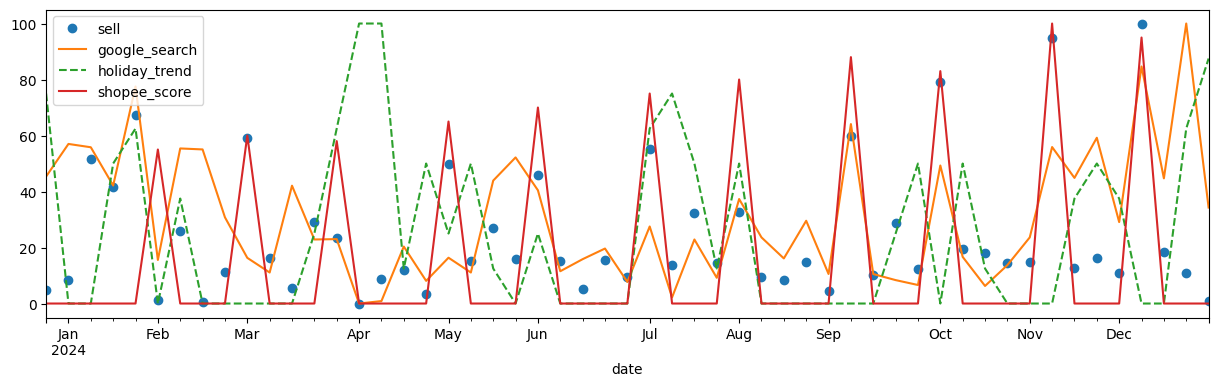

In [5]:

df[['sell','google_search','holiday_trend','shopee_score']].loc['2023-12-31':].plot(figsize=(15,4), style=['o','-','--'])

In [ ]:
df

,sell,google_search,holiday_trend,shopee_score
date,,,,
2023-12-31,5.003164,45.350491,75.0,0.0
2024-01-07,8.249064,56.993085,0.0,0.0
2024-01-14,51.597883,55.806658,0.0,0.0
2024-01-21,41.463065,42.138356,50.0,0.0
2024-01-28,67.181086,77.520634,62.5,0.0
2024-02-04,1.423108,15.569931,0.0,55.0
2024-02-11,25.805569,55.382835,37.5,0.0
2024-02-18,0.539291,55.031508,0.0,0.0
2024-02-25,11.137503,30.789929,0.0,0.0


In [7]:
import pytorch_lightening as pl
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset



ModuleNotFoundError: No module named 'pytorch_lightening'